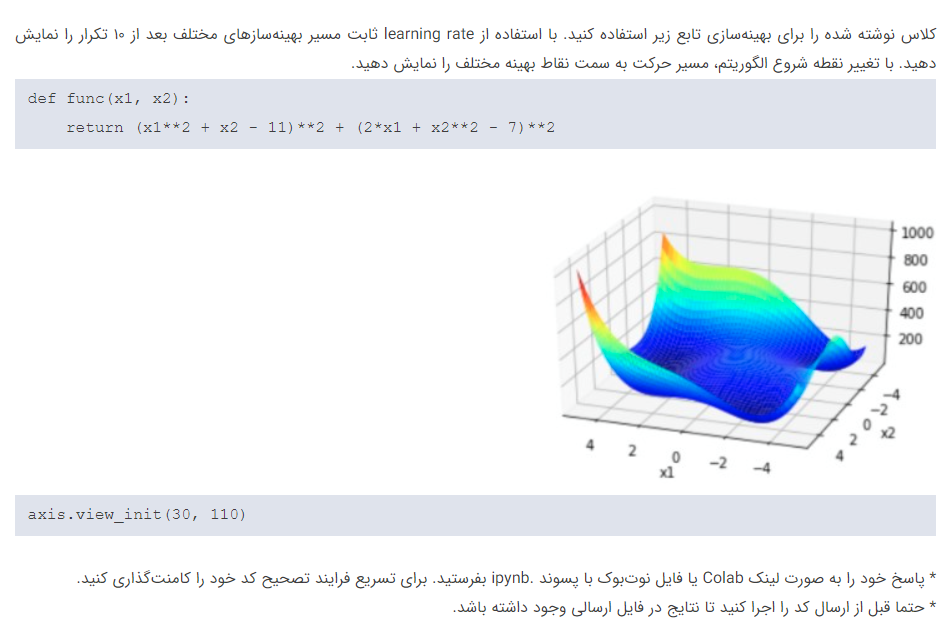

برای حل این سوال، نیاز به نوشتن یک کلاس پایتون برای بهینه‌سازی تابع داریم که از گرادیان نزولی (Gradient Descent) استفاده کند. سپس با استفاده از این کلاس و نرخ یادگیری ثابت، مسیرهای بهینه‌سازی را از نقاط شروع مختلف بعد از ۱۰ تکرار نمایش می‌دهیم. در زیر کلاس Optimizer و کد مربوط به تولید نمودارهای بهینه‌سازی آورده شده است:

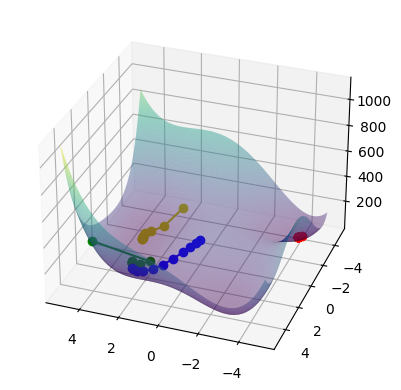

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Optimizer:
    def __init__(self, func, grad_func, learning_rate):
        self.func = func
        self.grad_func = grad_func
        self.learning_rate = learning_rate

    def optimize(self, starting_point, iterations):
        path = [starting_point]
        point = starting_point
        for _ in range(iterations):
            gradient = self.grad_func(point[0], point[1])
            point = point - self.learning_rate * gradient
            path.append(point)
        return np.array(path)

def func(x1, x2):
    return (x1**2 + x2 - 11)**2 + (2*x1 + x2**2 - 7)**2

def grad_func(x1, x2):
    df_dx1 = 4*x1*(x1**2 + x2 - 11) + 2*(2*x1 + x2**2 - 7)
    df_dx2 = 2*(x1**2 + x2 - 11) + 4*x2*(2*x1 + x2**2 - 7)
    return np.array([df_dx1, df_dx2])

# Parameters
learning_rate = 0.01
iterations = 10
starting_points = [np.array([-4.0, -4.0]), np.array([4.0, 4.0]), np.array([0.0, 0.0]), np.array([2.0, -3.0])]

optimizer = Optimizer(func, grad_func, learning_rate)

# Plotting the function and optimization paths
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-5, 5, 400)
Y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(X, Y)
Z = func(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.5)

colors = ['r', 'g', 'b', 'y']
for i, sp in enumerate(starting_points):
    path = optimizer.optimize(sp, iterations)
    ax.plot(path[:, 0], path[:, 1], func(path[:, 0], path[:, 1]), color=colors[i], marker='o')

ax.view_init(30, 110)
plt.show()


این کد شامل موارد زیر است:

تعریف کلاس Optimizer که شامل تابع بهینه‌سازی (optimize) است.
تعریف تابع هدف func و گرادیان آن grad_func.
ایجاد یک نمونه از کلاس Optimizer با نرخ یادگیری ثابت.
اجرای بهینه‌سازی از نقاط شروع مختلف و نمایش مسیرهای بهینه‌سازی روی نمودار سه‌بعدی.